# Homework 3
---
Jordan Ott

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from logisticClassify2 import *

# Problem 1

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = ml.transforms.rescale(X) # works much better on rescaled data

XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

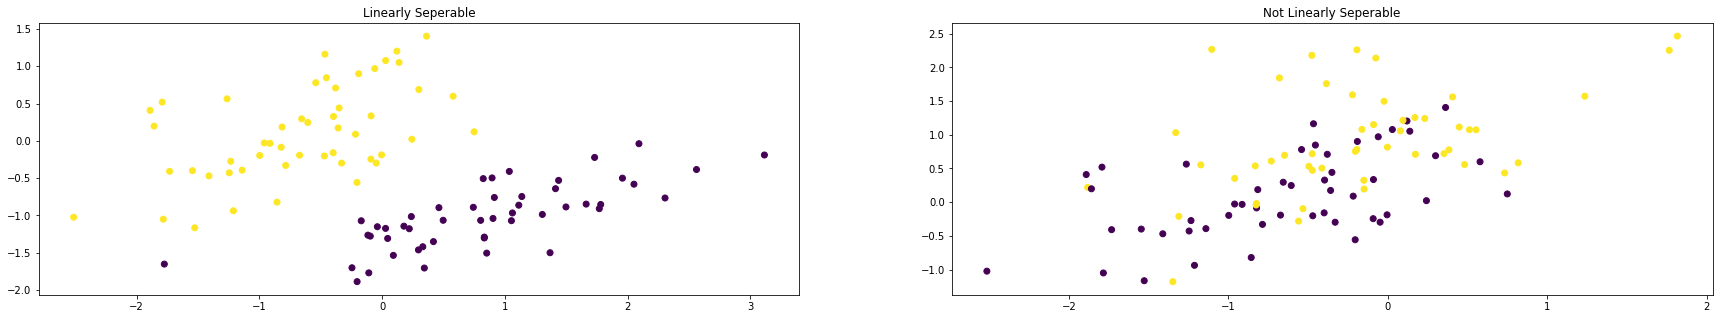

In [3]:
fig=plt.figure(figsize=(30,5))

ax=fig.add_subplot(1,2,1)        
ax.scatter(XA[:,0], XA[:,1], c=YA)
ax.set_title('Linearly Seperable')

ax=fig.add_subplot(1,2,2)        
ax.scatter(XB[:,0], XB[:,1], c=YB)
ax.set_title('Not Linearly Seperable')
plt.show()

In [ ]:
%%capture
"""
def plotBoundary(self,X,Y):
    if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
    ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]); 
    ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
    x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b

    # TODO find x2 values as a function of x1's values
    x2b = -(self.theta[0] + self.theta[1] * x1b)/self.theta[2]

    ## Now plot the data and the resulting boundary:
    A = Y==self.classes[0]; # and plot it:
    plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();
"""

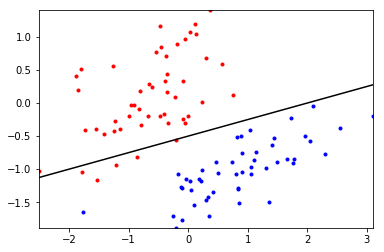

In [5]:
learnerA = logisticClassify2(); 
learnerA.classes = np.unique(YA) 

wts = np.array([.5,-.25,1]);
learnerA.theta = wts; 
learnerA.plotBoundary(XA, YA); 

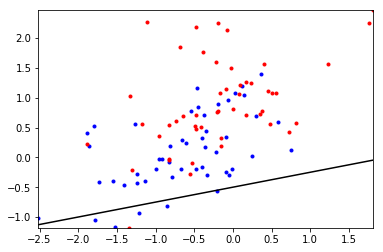

In [6]:
learnerB = logisticClassify2(); # create "blank" learner
learnerB.classes = np.unique(YB) # define class labels using YA or YB

wts = np.array([.5,-.25,1]); # TODO: fill in values
learnerB.theta = wts; # set the learner's parameters
learnerB.plotBoundary(XB, YB); 

In [7]:
%%capture
"""
def err(self, X, Y):
    Yhat = self.predict(X)
    err = 1 - np.sum(Yhat == Y) / float(Yhat.shape[0])
    return err

def predict(self, X):
    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
    r = self.theta[0] + self.theta[1] * X[:,0] + self.theta[2] * X[:,1]
    ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
    Yhat = r > 0
    ##       else predict class 0:  Yhat[i] = self.classes[0]
    return Yhat
"""

In [8]:
A_err = learnerA.err(XA, YA)
B_err = learnerB.err(XB, YB)

print('A error:',A_err,'B error:',B_err)

A error: 0.0505050505050505 B error: 0.5454545454545454


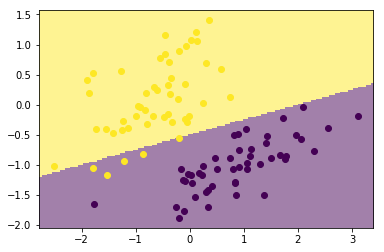

In [9]:
ml.plotClassify2D( learnerA, XA, YA )

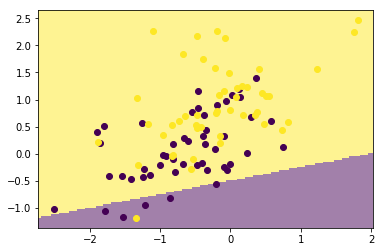

In [10]:
ml.plotClassify2D( learnerB, XB, YB )

$\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{\partial}{\partial \theta_{j}} y log \sigma (\theta^{T}x) + \frac{\partial}{\partial \theta_{j}} (1 - y) log [1 - \sigma (\theta^{T}x)]$  
$ = [\frac{y}{\sigma (\theta^{T}x)} - \frac{1 - y}{1 - \sigma (\theta^{T}x)}] \frac{\partial}{\partial \theta_{j}} \sigma (\theta^{T}x)$  
$ = [\frac{y}{\sigma (\theta^{T}x)} - \frac{1 - y}{1 - \sigma (\theta^{T}x)}] \sigma (\theta^{T}x) [1 - \sigma (\theta^{T}x)] x_{j}$  
$ = [\frac{y - \sigma (\theta^{T}x)}{\sigma (\theta^{T}x)[1 - \sigma (\theta^{T}x)]}] \sigma (\theta^{T}x) [1 - \sigma (\theta^{T}x)] x_{j}$  
$ = [y - \sigma (\theta^{T}x)] x_{j} $  

$\frac{\partial J(\theta)}{\partial \theta_{0}} = [y - \sigma (\theta^{T}x)] x_{0}$; $\frac{\partial J(\theta)}{\partial \theta_{1}} = [y - \sigma (\theta^{T}x)] x_{1}$; $\frac{\partial J(\theta)}{\partial \theta_{2}} = [y - \sigma (\theta^{T}x)] x_{2}$

In [ ]:
%%capture
"""
def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None, alpha=0):
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri    = self.sigmoid(np.dot(XX[i], self.theta));     # TODO: compute linear response r(x)
                gradi = -(YY[i] - ri) * XX[i] + alpha * self.theta;     # TODO: compute gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step
                
            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            Jsur = 0
            for i in np.random.permutation(M):
                ri    = self.sigmoid(np.dot(XX[i], self.theta));
                Jsur += np.log(ri + 1e-4) if YY[i]==1 else np.log(1 - ri + 1e-4)
                
            Jnll.append( -Jsur / M ) # TODO evaluate the current NLL loss

            if epoch > 1:
                if epoch > stopEpochs or np.abs(Jnll[-2] - Jnll[-1]) < stopTol:
                    done = True;  
        # plot when training is over
        plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
        if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
        plt.pause(.01);                    # let OS draw the plot
        
        print (self.theta, ' => ', Jnll[-1], ' / ', J01[-1])
"""

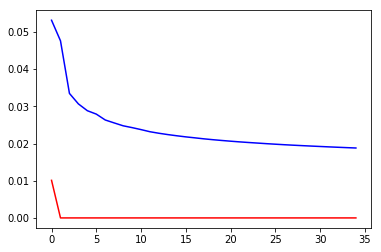

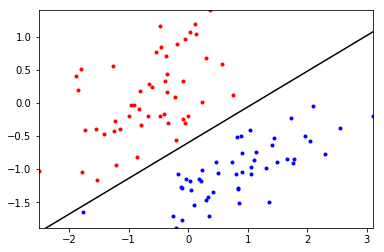

[ 4.46011079 -4.01542134  7.43250814]  =>  0.018794434130573343  /  0.0


In [11]:
learnerA.train(XA, YA)

### L2 Regularization

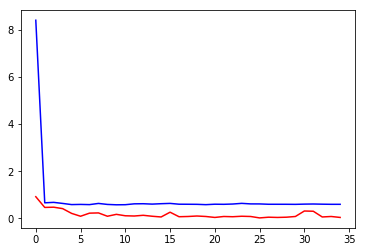

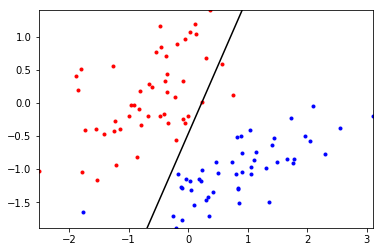

[ 0.04610384 -0.20322028  0.09847934]  =>  0.5969324702404014  /  0.04040404040404044


In [12]:
learnerA.train(XA, YA, alpha=2)

Using $\alpha = 2$ produces the above results. As we can see, the values of $\theta$ are much smaller because of the L2 penalty. Incurring a penalty on the magnitude of the weights does not allow the classifier to fit the data perfectly. As a result we see a higher error as well as a decision boundary that is not as good as the above model without regularization.

# Problem 2

1. $T(a + bx_{1})$  
a, b, and c: The VC dimension of this classifier is 3  
2. $T((a*b)x_{1} + (c/a)x_{2})$

3. $T((x_{1} - a)^{2} + (x_{2} - b)^{2} + c)$

4. $T(a + bx_{1} + cx_{2})*T(d + bx_{1} + cx_{2})$  

# Statement of Collaboration
I did not collaborate with anyone